# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
#from scipy.stats import linregress
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
size = 1500
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
num_cities = len(cities)
num_cities
cities_no_clean_df = pd.DataFrame(cities, columns =['City'])
cities_no_clean_df.head(20)

,City
0,tiksi
1,albany
2,khatanga
3,lima
4,attawapiskat
5,vaini
6,axim
7,arraial do cabo
8,hermanus
9,chincha alta


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

#columns = ['Latitude','Longitude','Temperature','Humidity']
cities_no_clean_df['Latitude'] = ""
cities_no_clean_df['Longitude'] = ""
cities_no_clean_df['Temperature'] = ""
cities_no_clean_df['Max Temp'] = ''
cities_no_clean_df['Humidity'] = ""
cities_no_clean_df['Wind Speed (mph)'] = ''
cities_no_clean_df['Cloudiness'] = ''

#cities_no_clean_df[columns] = ''




skipped_row = []
# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"

for index, row in cities_no_clean_df.iterrows():
    city_name = row['City']

    
    cities_url = url + 'q=' + city_name   + '&appid=' + weather_api_key + '&units=' + units
    city_json = requests.get(cities_url).json()
    try:
        
        cities_no_clean_df.loc[index,'Latitude'] = city_json['coord']['lat']
        cities_no_clean_df.loc[index,'Longitude'] = city_json['coord']['lon']
        cities_no_clean_df.loc[index,'Temperature'] = city_json['main']['temp']
        cities_no_clean_df.loc[index,'Max Temp'] = city_json['main']['temp_max']
        cities_no_clean_df.loc[index,'Humidity'] = city_json['main']['humidity']
        cities_no_clean_df.loc[index,'Wind Speed (mph)'] = city_json['wind']['speed']
        cities_no_clean_df.loc[index,'Cloudiness'] = city_json['clouds']['all']
        

        print(f'Processing Record {index + 1} of {num_cities} | {city_name}')
        
    except (KeyError, IndexError):
        print(f"Missing field/result... skipping row {index + 1} .")
        cities_no_clean_df.loc[index,'Latitude'] = None
        cities_no_clean_df.loc[index,'Longitude'] = None
        cities_no_clean_df.loc[index,'Temperature'] = None
        cities_no_clean_df.loc[index,'Max Temp'] = None
        cities_no_clean_df.loc[index,'Humidity'] = None
        cities_no_clean_df.loc[index,'Wind Speed (mph)'] = None
        cities_no_clean_df.loc[index,'Cloudiness'] = None
        skipped_row.append(index)
        
    

cities_no_clean_df.head(20)


Processing Record 1 of 579 | tiksi
Processing Record 2 of 579 | albany
Processing Record 3 of 579 | khatanga
Processing Record 4 of 579 | lima
Missing field/result... skipping row 5 .
Processing Record 6 of 579 | vaini
Processing Record 7 of 579 | axim
Processing Record 8 of 579 | arraial do cabo
Processing Record 9 of 579 | hermanus
Processing Record 10 of 579 | chincha alta
Processing Record 11 of 579 | laguna
Processing Record 12 of 579 | torbay
Processing Record 13 of 579 | lorengau
Processing Record 14 of 579 | mayo
Processing Record 15 of 579 | bredasdorp
Processing Record 16 of 579 | avarua
Missing field/result... skipping row 17 .
Processing Record 18 of 579 | tabas
Missing field/result... skipping row 19 .
Processing Record 20 of 579 | severo-kurilsk
Processing Record 21 of 579 | hobart
Processing Record 22 of 579 | east london
Processing Record 23 of 579 | atuona
Processing Record 24 of 579 | mount gambier
Processing Record 25 of 579 | punta arenas
Processing Record 26 of 579

Processing Record 206 of 579 | rawson
Processing Record 207 of 579 | vinukonda
Processing Record 208 of 579 | leshukonskoye
Processing Record 209 of 579 | lubaczow
Missing field/result... skipping row 210 .
Processing Record 211 of 579 | tilichiki
Processing Record 212 of 579 | crisan
Missing field/result... skipping row 213 .
Missing field/result... skipping row 214 .
Processing Record 215 of 579 | upernavik
Missing field/result... skipping row 216 .
Processing Record 217 of 579 | saldanha
Processing Record 218 of 579 | inuvik
Processing Record 219 of 579 | nabire
Processing Record 220 of 579 | maragogi
Processing Record 221 of 579 | mecca
Processing Record 222 of 579 | san patricio
Missing field/result... skipping row 223 .
Processing Record 224 of 579 | hami
Processing Record 225 of 579 | sitka
Processing Record 226 of 579 | ostrovnoy
Processing Record 227 of 579 | havre-saint-pierre
Processing Record 228 of 579 | hurghada
Processing Record 229 of 579 | samarai
Processing Record 230

Processing Record 409 of 579 | forestville
Processing Record 410 of 579 | saint-augustin
Missing field/result... skipping row 411 .
Missing field/result... skipping row 412 .
Processing Record 413 of 579 | montepuez
Processing Record 414 of 579 | dakar
Processing Record 415 of 579 | gemona
Processing Record 416 of 579 | duarte
Processing Record 417 of 579 | asau
Processing Record 418 of 579 | magistralnyy
Processing Record 419 of 579 | salinopolis
Processing Record 420 of 579 | villamontes
Processing Record 421 of 579 | oliver
Processing Record 422 of 579 | gat
Processing Record 423 of 579 | devonport
Processing Record 424 of 579 | luanda
Missing field/result... skipping row 425 .
Processing Record 426 of 579 | damietta
Processing Record 427 of 579 | pitsunda
Processing Record 428 of 579 | norsup
Processing Record 429 of 579 | lipari
Processing Record 430 of 579 | okhotsk
Processing Record 431 of 579 | itagiba
Processing Record 432 of 579 | basi
Processing Record 433 of 579 | klamath f

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness
0,tiksi,71.6872,128.869,31.12,31.12,81,7.47,94
1,albany,42.6001,-73.9662,55.54,55.99,90,4.09,100
2,khatanga,71.9667,102.5,30.74,30.74,94,7.7,100
3,lima,-12.0432,-77.0282,67.5,68,77,9.22,0
4,attawapiskat,None,None,None,None,None,None,None
5,vaini,-21.2,-175.2,75.2,75.2,100,5.75,90
6,axim,4.8699,-2.2405,81.07,81.07,79,5.5,100
7,arraial do cabo,-22.9661,-42.0278,71.6,71.6,88,6.91,40
8,hermanus,-34.4187,19.2345,55.99,55.99,75,5.99,54
9,chincha alta,-13.4099,-76.1323,66.6,66.99,88,4.61,5


In [4]:
cities_url = url + 'q=' + 'puerto ayora'   + '&appid=' + weather_api_key + '&units=' + units

requests.get(cities_url).json()
print(len(cities_no_clean_df))

579


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = cities_no_clean_df.dropna().reset_index(drop=True)

cities_df.to_csv(output_data_file, index = False)
print(len(cities_df))
cities_df.head(30)

530


,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness
0,tiksi,71.6872,128.869,31.12,31.12,81,7.47,94
1,albany,42.6001,-73.9662,55.54,55.99,90,4.09,100
2,khatanga,71.9667,102.5,30.74,30.74,94,7.7,100
3,lima,-12.0432,-77.0282,67.5,68,77,9.22,0
4,vaini,-21.2,-175.2,75.2,75.2,100,5.75,90
5,axim,4.8699,-2.2405,81.07,81.07,79,5.5,100
6,arraial do cabo,-22.9661,-42.0278,71.6,71.6,88,6.91,40
7,hermanus,-34.4187,19.2345,55.99,55.99,75,5.99,54
8,chincha alta,-13.4099,-76.1323,66.6,66.99,88,4.61,5
9,laguna,38.421,-121.424,89.98,91.99,13,6.91,1


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_humidity_df = cities_df.loc[cities_df['Humidity'] <=100,:]
print(len(cities_humidity_df))
cities_humidity_df.head()


530


,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness
0,tiksi,71.6872,128.869,31.12,31.12,81,7.47,94
1,albany,42.6001,-73.9662,55.54,55.99,90,4.09,100
2,khatanga,71.9667,102.5,30.74,30.74,94,7.7,100
3,lima,-12.0432,-77.0282,67.5,68,77,9.22,0
4,vaini,-21.2,-175.2,75.2,75.2,100,5.75,90


In [7]:
#  Get the indices of cities that have humidity over 100%.
cities_humidity_100_df = cities_df.loc[cities_df['Humidity'] > 100,:]
cities_humidity_100_df.index.to_numpy()
cities_humidity_100_df

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

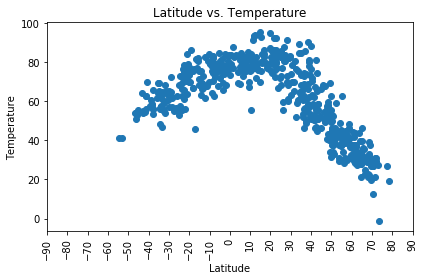

In [9]:
latitude = cities_humidity_df['Latitude']
temperature = cities_humidity_df['Temperature']
ticks = range(-90,100,10)
humidity = cities_humidity_df['Humidity']
cloudiness = cities_humidity_df['Cloudiness']
wind_speed = cities_humidity_df['Wind Speed (mph)']

lat_temp = plt.scatter(x = latitude,y = temperature)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.xticks(ticks, rotation=90)


image_base = 'Lat_VS_Temperature' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()


## Latitude vs. Humidity Plot

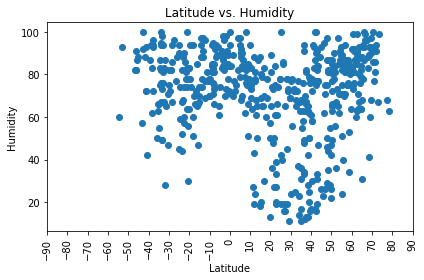

In [10]:
lat_humidity = plt.scatter(x = latitude,y = humidity)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xticks(ticks, rotation=90)

image_base = 'Latitude_VS_Humidity Plot' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()



## Latitude vs. Cloudiness Plot

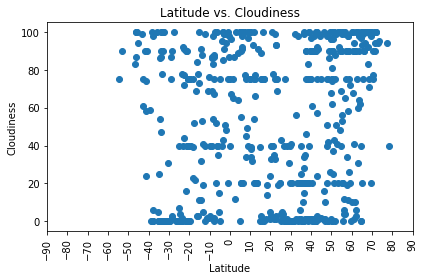

In [11]:
lat_cloudiness = plt.scatter(x = latitude,y = cloudiness)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xticks(ticks, rotation=90)

image_base = 'Latitude vs. Cloudiness Plot' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

## Latitude vs. Wind Speed Plot

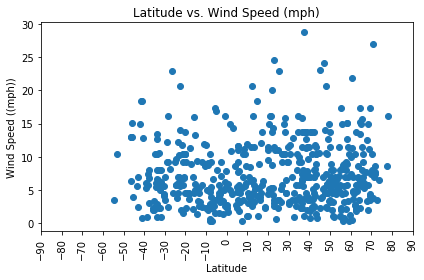

In [12]:
lat_wind = plt.scatter(x = latitude,y = wind_speed)
plt.title('Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed ((mph))')
plt.xticks(ticks, rotation=90)

image_base = 'Latitude vs. Wind Speed Plot' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

## Linear Regression

In [13]:
#Norther Hemisphere
northern = cities_humidity_df.loc[cities_humidity_df['Latitude']>=0,:]
northern_lat = northern.loc[:,'Latitude'].astype(float)


southern = cities_humidity_df.loc[cities_humidity_df['Latitude']<0,:]
southern_lat = southern.loc[:,'Latitude'].astype(float)



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

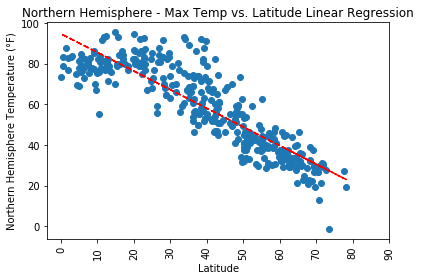

In [14]:
northern_temp = northern.loc[:,'Max Temp'].astype(float)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_temp)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_temp)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Temperature (°F)')

image_base = 'Northern_Hemispher_VS_Max_Temp' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

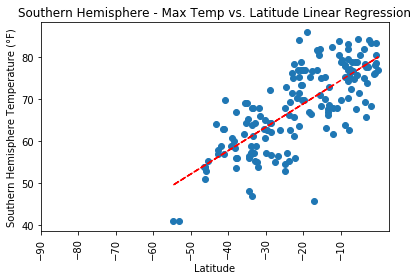

In [15]:
southern_temp = southern.loc[:,'Max Temp'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_temp)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_temp)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.xticks(range(-90,0,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Temperature (°F)')

image_base = 'Southern_Hemispher_VS_Max_Temp' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

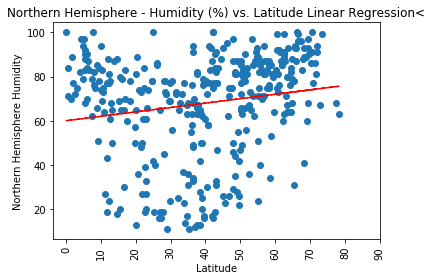

In [16]:
northern_humidity = northern.loc[:,'Humidity'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_humidity)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_humidity)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression<')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Humidity')

image_base = 'Northern_Hemispher_VS_Humidity' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)



plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

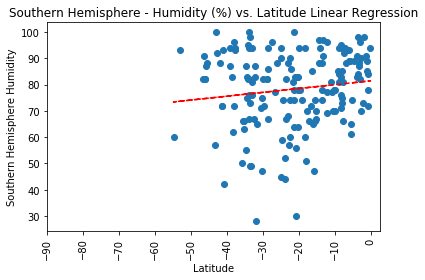

In [17]:
southern_humidity = southern.loc[:,'Humidity'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_humidity)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_humidity)
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xticks(range(-90,10,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Humidity')

image_base = 'Southern_Hemispher_VS_Humidity' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

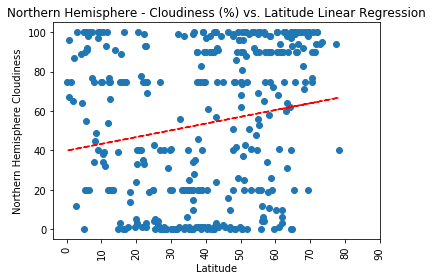

In [18]:
northern_cloudiness = northern.loc[:,'Cloudiness'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_cloudiness)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_cloudiness)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Cloudiness')

image_base = 'Northern_Hemispher_VS_Cloudiness' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

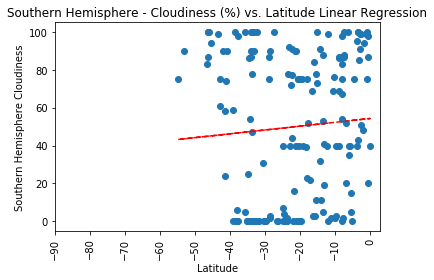

In [19]:
southern_cloudiness = southern.loc[:,'Cloudiness'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_cloudiness)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_cloudiness)
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xticks(range(-90,10,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Cloudiness')

image_base = 'Southern_Hemispher_VS_Cloudiness' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

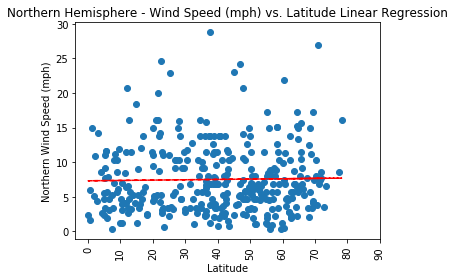

In [20]:
northern_wind = northern.loc[:,'Wind Speed (mph)'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_wind)

vc_fit = vc_slope * northern_lat + vc_int

plt.scatter(northern_lat,northern_wind)
plt.plot(northern_lat,vc_fit,"--",color = 'r')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xticks(range(0,100,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Northern Wind Speed (mph)')

image_base = 'Northern_Hemispher_VS_Wind_Speed' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

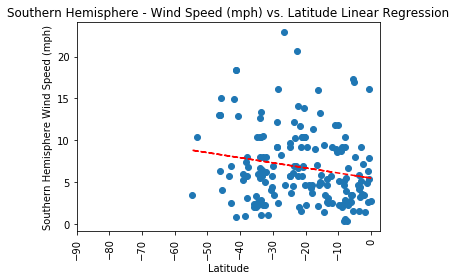

In [21]:
southern_wind = southern.loc[:,'Wind Speed (mph)'].astype(float)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_wind)

vc_fit = vc_slope * southern_lat + vc_int

plt.scatter(southern_lat,southern_wind)
plt.plot(southern_lat,vc_fit,"--",color = 'r')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xticks(range(-90,10,10), rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Wind Speed (mph)')

image_base = 'Southern_Hemispher_VS_Wind_Speed' 
image_name = image_base + '.png'
file_path = os.path.join('output_data',image_name)
plt.tight_layout()

plt.savefig(file_path)


plt.show()